In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
df_index=pd.read_csv('economic_index.csv')

In [5]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [9]:
## drop unnecessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [13]:
## check for null values

In [17]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [19]:
## lets do some visualization

In [21]:
import seaborn as sns

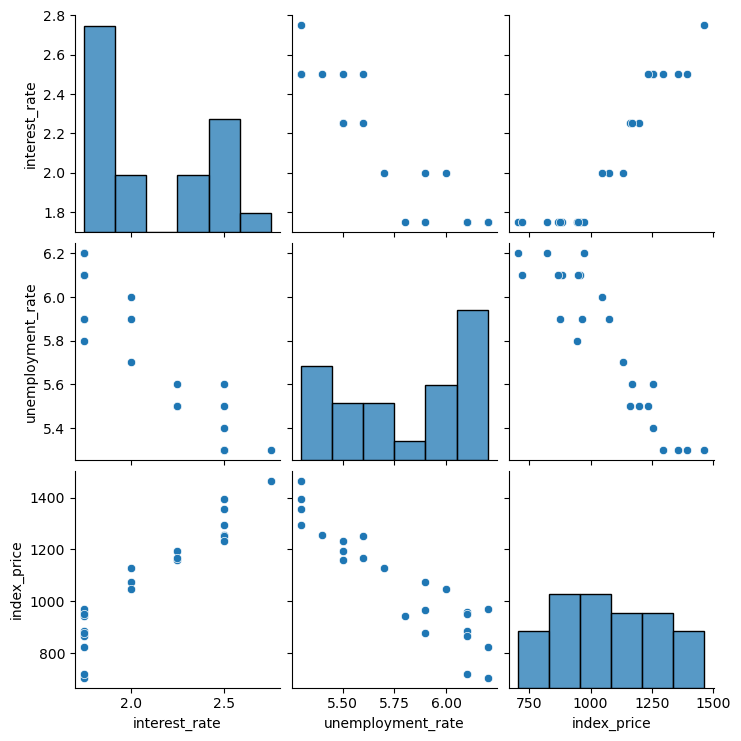

In [23]:
sns.pairplot(df_index)

In [25]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

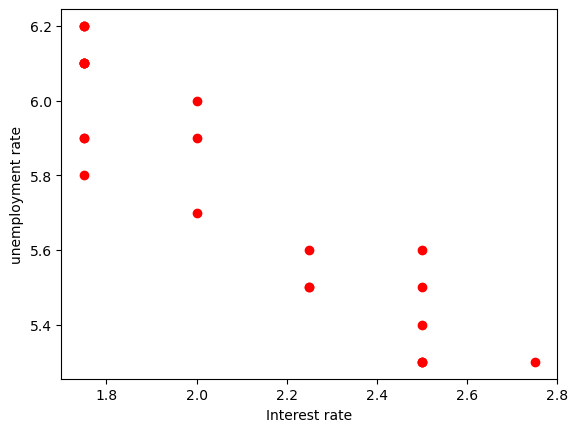

In [27]:
## visualize the datapoints more closely.
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("unemployment rate")

In [29]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [31]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [33]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [35]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.25,random_state=42)

In [37]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

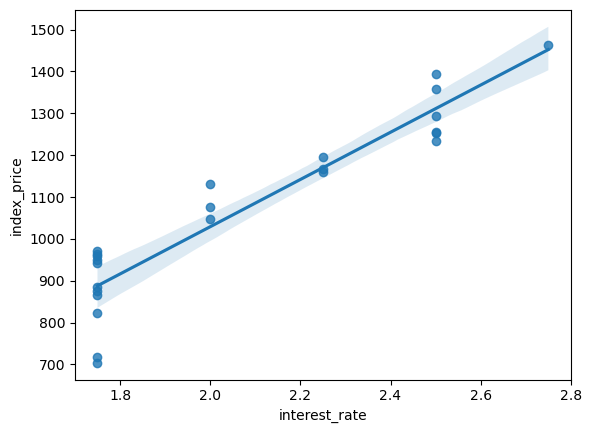

In [47]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'],data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

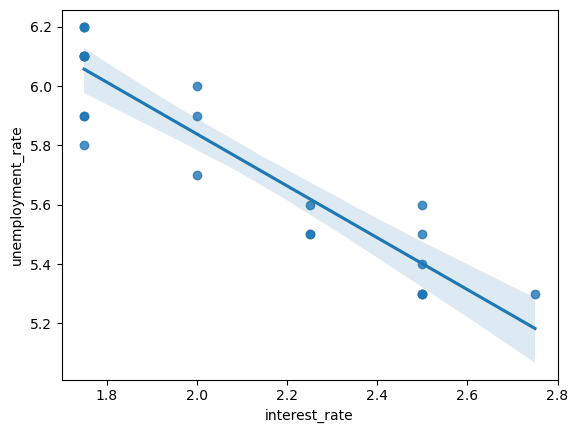

In [49]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'],data=df_index)

<Axes: xlabel='index_price', ylabel='index_price'>

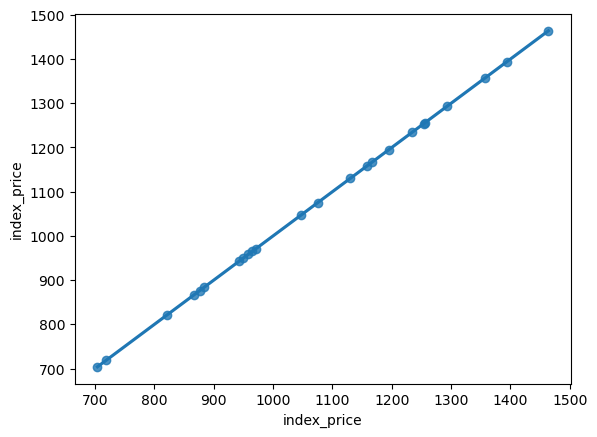

In [51]:
sns.regplot(x=df_index['index_price'],y=df_index['index_price'],data=df_index)

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [57]:
X_train

array([[-0.8660254 ,  1.27807831],
       [ 0.8660254 , -1.14354375],
       [ 0.        , -0.3363364 ],
       [-0.8660254 ,  0.06726728],
       [-0.8660254 ,  1.27807831],
       [ 1.73205081, -1.14354375]])

In [59]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [61]:
regression.fit(X_train,y_train)

LinearRegression()

In [63]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',
                                cv=3)

In [65]:
np.mean(validation_score)


-7820.756240551772

In [67]:
## prediction
y_pred=regression.predict(X_test)

In [69]:
y_pred

array([1146.20748698,  797.05686794, 1280.87888652,  839.95271184,
        950.18425551, 1103.31164308,  925.74439964, 1256.43903065,
        797.05686794, 1127.75149895, 1256.43903065,  907.28841161,
        839.95271184, 1256.43903065, 1213.54318675,  797.05686794,
        839.95271184,  925.74439964])

In [71]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

10682.505098685864
89.97791862049174
103.35620493558122


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Assumptions

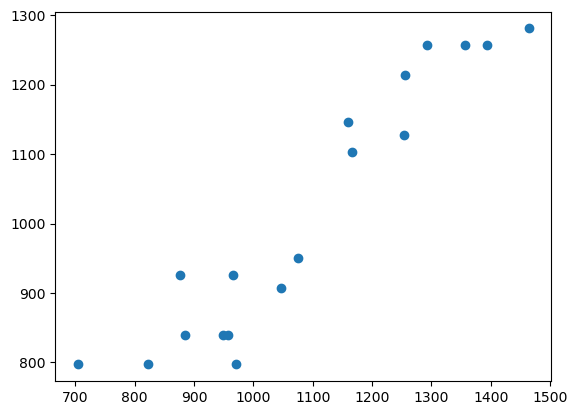

In [75]:
plt.scatter(y_test,y_pred)


In [77]:
residuals=y_test-y_pred
print(residuals)

8      12.792513
16    173.943132
0     183.121113
18     44.047288
11    124.815744
9      63.688357
13     39.255600
1     137.560969
21     24.943132
5     126.248501
2     100.560969
12    139.711588
15    118.047288
3      36.560969
4      42.456813
22    -93.056868
17    109.047288
20    -49.744400
Name: index_price, dtype: float64


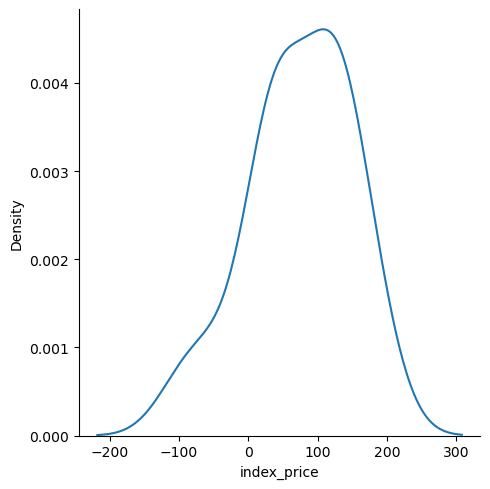

In [79]:
## Plot this residuals
sns.displot(residuals,kind='kde')

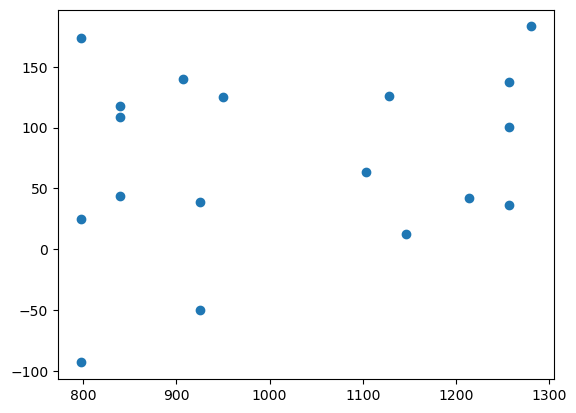

In [81]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [83]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [85]:
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):             -0.455
Method:                 Least Squares   F-statistic:                            0.06202
Date:                Mon, 15 Sep 2025   Prob (F-statistic):                       0.941
Time:                        10:46:09   Log-Likelihood:                         -50.055
No. Observations:                   6   AIC:                                      104.1
Df Residuals:                       4   BIC:                                      103.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            34.6963   1044.618      0.033      0.975   -2865.627    2935.020
x2          -147.7716   1044.618     -0.141      0.894   -3048.095    2752.552
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.006
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.437
Skew:                           0.168   Prob(JB):                        0.804
Kurtosis:                       1.721   Cond. No.                         3.85
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
print(regression.coef_)


[  34.69626498 -147.77156853]
